In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
train=pd.read_csv('titanic/train.csv')
test= pd.read_csv('titanic/test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


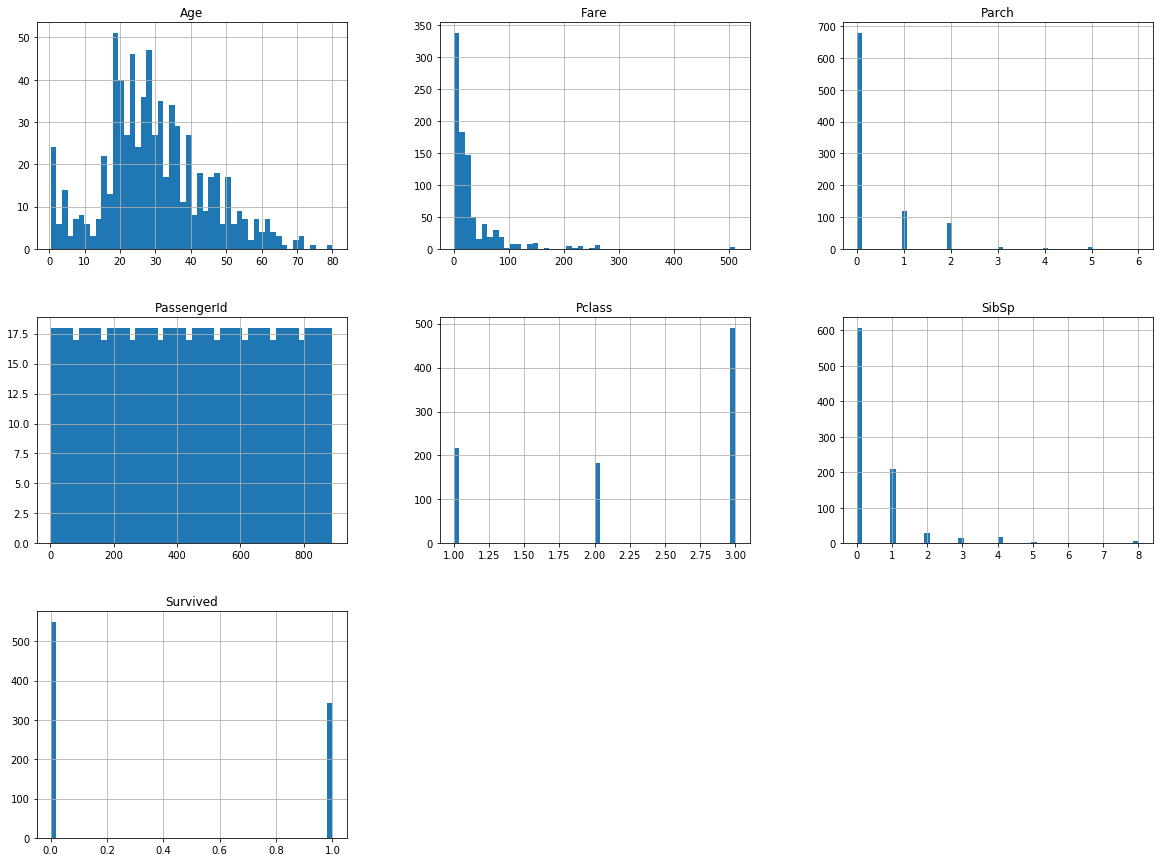

In [19]:
train.hist(bins=50, figsize=(20,15))
plt.show()

## Split train/test data

In [27]:
np.random.seed(42)

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [30]:
print(len(train_set), "train +", len(test_set), "test")

712 train + 179 test


In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train['Pclass']):
    strat_train_set=train.loc[train_index]
    strat_test_set=train.loc[test_index]

In [35]:
train['Pclass'].value_counts()/len(train)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [41]:
strat_train_set['Pclass'].value_counts()/len(strat_train_set)

3    0.550562
1    0.242978
2    0.206461
Name: Pclass, dtype: float64

In [42]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S


## Looking for corelations

In [44]:
corr_matrix=train.corr()

In [45]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11dc4729e8>,
      dtype=object)

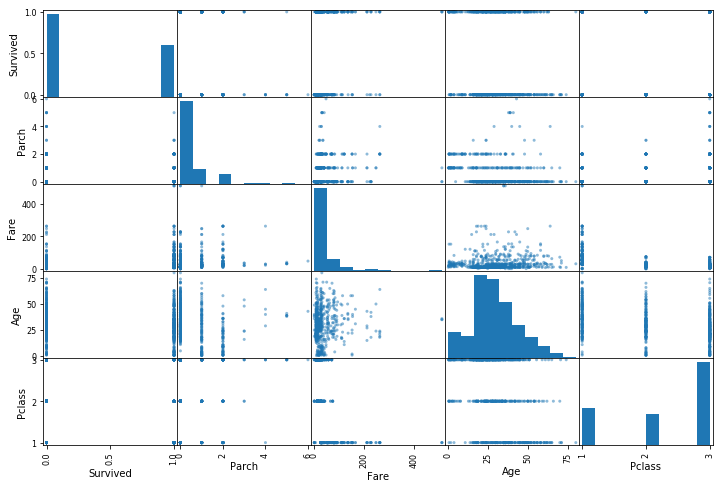

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Parch", "Fare",
              "Age", 'Pclass']
scatter_matrix(train[attributes], figsize=(12, 8))

## First try correlation one-way anova

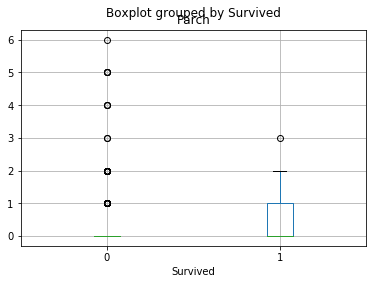

In [64]:
from scipy import stats
# F,p=stats.f_oneway(strat_train_set[''])
strat_train_set.boxplot("Parch", by ='Survived')

In [ ]:
# Try chi square to find correlations

## Preparing the data for ML algorithms

Fill all NAN values with a number/property. Delete them or fill in the median value

In [52]:
train = strat_train_set.drop("Survived", axis=1) 
train_labels= strat_train_set["Survived"].copy()

In [55]:
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
403,404,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
343,344,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
514,515,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S


In [56]:
sample_incomplete_rows.drop("Cabin", axis=1) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,S
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,S
403,404,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,S
343,344,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,S
514,515,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,S


In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
encoder=OneHotEncoder()    


In [66]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
imputer = SimpleImputer(strategy='median')